<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/litneet64/Lab-5/litneet64_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Quadrature**
**Pablo Aravena**

# **Abstract**

 In this lab we are tasked with implementing a function for the Gauss Quadrature over $2$ and $3$ points, with the latter requiring a reference triangle, and then implementing the Monte Carlo Integration. A scatter plot was later used to show how our implementation for this last method's convergence rate is close to $\frac{1}{\sqrt{n}}$.

# **About the code**

In [0]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Pablo Aravena (pjan2@kth.se)

# Based on the template by Johan Hoffman (jhoffman@kth.se)
# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from math import sqrt, isclose
import scipy.integrate as integrate
import random as rd
import unittest
import matplotlib.pyplot as plt

# **Introduction**

  We implemented 3 methods to calculate the quadrature for different functions, which in this case are polynomials. Randomized coefficients for several cubic polynomials were used for the tests of the different methods, the correct answers were verified with the already implemented numpy functions made for the same purposes.
  
  For the 2-Point Gaussian Quadrature, a map was made from the required interval, $[0, 1]$, to the interval $[-1, 1]$, and with the given, already knonw, coefficients. This quadrature method is exact on this degree, however as there are  some floating point arithmetics the results sometimes are not exact by a marginal error, thus for the tests, the $\texttt{allclose()}$ with an error of $10^{-9}$ was used to check for equality of results.
  
  For the 3-Point Gaussian Quadrature the reference triangle used was the one formed by points $(0, 1)$, $(1, 0)$ and $(0, 0)$, using the already known weights $w_0 = w_1 = w_2 = \frac{1}{6}$. The tests follows the same characteristics as the ones mentioned for the 2-Point Gaussian Quadrature.
  
  Finally, we implemented the Monte Carlo Quadrature over the interval $[0, 1]$ and checked that it's convergence rate was close to $\frac{1}{\sqrt{n}}$ multiplied by a constant, as to make a better visual representation, using a scatter plot of the errors we got between our approximations and the real integral results. 

# **Methods**

#### 2-Point Gaussian Quadrature

 In this method we made a map from the interval $[0, 1]$ to $[-1, 1]$ as to go just with the regular by-the-book Gauss Quadrature with 2 points. The following transformation was used:
 
\begin{equation*}
    t = \frac{(b - a)}{2} \cdot x + \frac{b + a}{2}\\
    \implies dt = \frac{(b - a)}{2} \cdot dx\\
     \int_a^b{ f(t) } dt = \int_{-1}^1 {\frac{(b - a)}{2} \cdot f\left(\frac{(b - a)\cdot x + b + a}{2}\right)} dx
\end{equation*}



And then we followed the Gauss Quadrature definition:

\begin{equation*}
    \int_{-1}^1 {\frac{(b - a)}{2} \cdot f\left(\frac{(b - a)\cdot x + b + a}{2}\right)} dx =
    \sum_{i = 1}^2 f\left(\frac{(b - a)\cdot x_i + b + a}{2}\right) \cdot w_i
\end{equation*}



The weights ($w_i$) and points ($x_i$) used were the ones extracted from the lecture notes on $\textit{Example}$ $11.3$

In [0]:
# 2-point Gauss Quadrature
def Gauss2Points(pol):
    # definitions for the 2 point Gaussian Quadrature over [-1, 1]
    x0 = 1.0/sqrt(3)
    x1 = -x0
    w0 = w1 = 1.0
    
    # make map from [0, 1] to [-1, 1]
    a, b = 0, 1
    b_a = (b - a) / 2.0
    res_integral = (pol(((b - a)*x0 + b + a) / 2.0) * w0 + pol(((b - a)* x1 + b + a) / 2.0) * w1) * b_a
    
    return res_integral



#### 3-Point Gaussian Quadrature (over a Reference Triangle)
  As stated on the lecture notes as seen on $Example$ $11.5$, the middle points of the triangle had to be used, hence $(0, \frac{1}{2})$, $(\frac{1}{2}, 0)$ and $(\frac{1}{2}, \frac{1}{2})$, and for the weights, $\frac{1}{6}$ was used.
  
  The integral was then calculated as:
 
\begin{equation*}
    \int_D f(x, y) dx dy = \sum_{i = 0}^2 f(x_i, y_i) \cdot w
\end{equation*}

For the testing of this specific method, the following integral over the reference triagle was used:
\begin{equation*}
    \int_0^1 \int_0^{1 - y} f(x, y) dx dy
\end{equation*}

In [0]:
# 3-point quadrature over a ref triangle
def refTriangleQuad3Point(func):
    # reference triangle mid-points and weights
    mid_pts = [(0, 1/2), (1/2, 0), (1/2, 1/2)]
    w = 1 / 6
        
    return sum(map(lambda tup: func(tup[0], tup[1]) * w, mid_pts))


#### Monte Carlo Quadrature over the Interval [0, 1]

The implementation follows the theory shown on the lecture notes as seen on $12.4$:
  
\begin{equation*}
    \int_{D} f(x) dx \approx \frac{|D|}{n} \cdot \sum_{i = 1}^n f(x_i)
\end{equation*}

Where $|D| = \int_0^1 dx$

In [0]:
# Monte Carlo Quadrature over a Unit Interval
def MCQuadInterval(func, N):
    # integral of area with function 1 and total of samples to take
    V = integrate.quad(lambda x: 1, 0, 1)[0]
    
    # sum of evaluated random points
    sum_bar = 0
    
    # get N samples between 0 and 1
    for i in range(N):
        x_bar = rd.random()
        sum_bar += func(x_bar)
    
    # return approximated integral
    return (V / N) * sum_bar



#### Main Test Functions

 The author used the `unittesting` framework for general purpose testing, with one class just for the Gauss Quadrature,  where we made randomized coefficients to create polynomials and then compare the obtained results with the real ones provided by `Sympy`.
 
 Just below the previous class, lays the one for the Monte Carlo Quadrature, where we tried to create $100$ differents polynomials and then obtain the errors given when we try to calculate the integral with $1$ up to $N$ points. The real result to compare with was provided again by `Sympy`. After it, the author plotted these obtained points along with the targeted function ($\frac{1}{\sqrt{N}}$) as a visual aid.

In [0]:
# test class for Gauss Quadrature
class testGaussQuad(unittest.TestCase):
    # class constants
    RANDOM_TESTS = 10000
    RAND_UPPER_LIMIT = 101
    RAND_LOWER_LIMIT = 2
    
    # random test for 2 point polynomial integration
    def test_2Points(self):
        coeffs = [0 for i in range(4)]
        
        # make 10.000 random tests with random coefficient polynomials
        for i in range(self.RANDOM_TESTS):
            for i in range(4):
                coeffs[i] = rd.randint(self.RAND_LOWER_LIMIT, self.RAND_UPPER_LIMIT)
            
            rand_pol = lambda x: coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]
            
            # get the real integral and assert they are equal (close by a small relative error)
            real_integral =  integrate.quad(rand_pol, 0, 1)[0]
            
            self.assertTrue(isclose(Gauss2Points(rand_pol), real_integral), "Should be {real_integral}")

            
    # random test for 3 point polynomial integration over a reference triangle
    def test3PointsRefTriangle(self):
        coeffs = [0 for i in range(6)]
        
        # make 10.000 random tests with random coefficients for quadratic, 2-variable polynomials
        for i in range(self.RANDOM_TESTS):
            for i in range(6):
                coeffs[i] = rd.randint(self.RAND_LOWER_LIMIT, self.RAND_UPPER_LIMIT)
            
            rand_pol = lambda x, y: coeffs[0]*x**2 + coeffs[1]*y**2 + coeffs[2]*x*y + coeffs[3]*x + coeffs[4]*y + coeffs[5]
            
            # get the real integral and assert they are equal (close by a small relative error)
            real_integral = integrate.dblquad(rand_pol, 0, 1, 0, lambda x: 1 - x)[0]
            
            self.assertTrue(isclose(refTriangleQuad3Point(rand_pol), real_integral), "Should be {real_integral}")
    
    
class testMonteCarloQuad():
    # class constants
    RAND_TESTS = 100
    RAND_UPLIMIT = 101
    RAND_LOWLIMIT = 2
    N = 1000
    
    # class constructor
    def __init__(self):
        self.showMonteCarloConv()
    
    # convergence plotting function for the Monte Carlo Quadrature
    def showMonteCarloConv(cls):
        
        # general purpose polynomial coefficients array
        C = [0, 0, 0]
        
        # array with ints from 1 to 1.000
        N_arr = [i for i in range(1, cls.N + 1)]
        
        # make random polynomials and get their convergence rates
        for i in range(cls.RAND_TESTS):
            for i in range(3):
                 C[i] = rd.randint(cls.RAND_LOWLIMIT, cls.RAND_UPLIMIT)
            
            rand_pol = lambda x: C[0]*x**2 + C[1]*x + C[2]
            
            # get convergence rate for this specific polynomial over 1.000 samples
            # and add the points to the plot
            plt.scatter(N_arr, cls.getErrorArray(rand_pol))
        
        
        # add our function to compare and redefine N_arr to plot function near 0
        N_arr = [i/float(cls.N) for i in range(1, cls.N + 1)] + N_arr
        plt.plot(N_arr, list(map(lambda x: 2.0 / sqrt(x), N_arr)), ",--r", linewidth = 9)
        plt.legend([" 1\n___\n  __\n\| n"], fontsize = 30)
        
        # setup size of figure (width, height)
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 30
        fig_size[1] = 20
        plt.rcParams["figure.figsize"] = fig_size
        
        # setup labels for graph and show it
        plt.title('Convergence rate as N gets bigger', fontsize = 50)
        plt.ylabel('Relative Error', fontsize = 35)
        plt.xlabel('Number of random points (N)', fontsize = 35)
                        
        plt.show()
    
    # get error array for given function
    def getErrorArray(self, func):
        # insert 1.000 null values
        error_array = [0 for i in range(self.N)]
    
        # increase N, get the approximations and calculate their errors
        for i in range(self.N):
            error_array[i] = abs(MCQuadInterval(func, i + 1) - integrate.quad(func, 0, 1)[0])
        
        return error_array 


        
        

# **Results**

The next segment of code shows the bulk tests for each method.

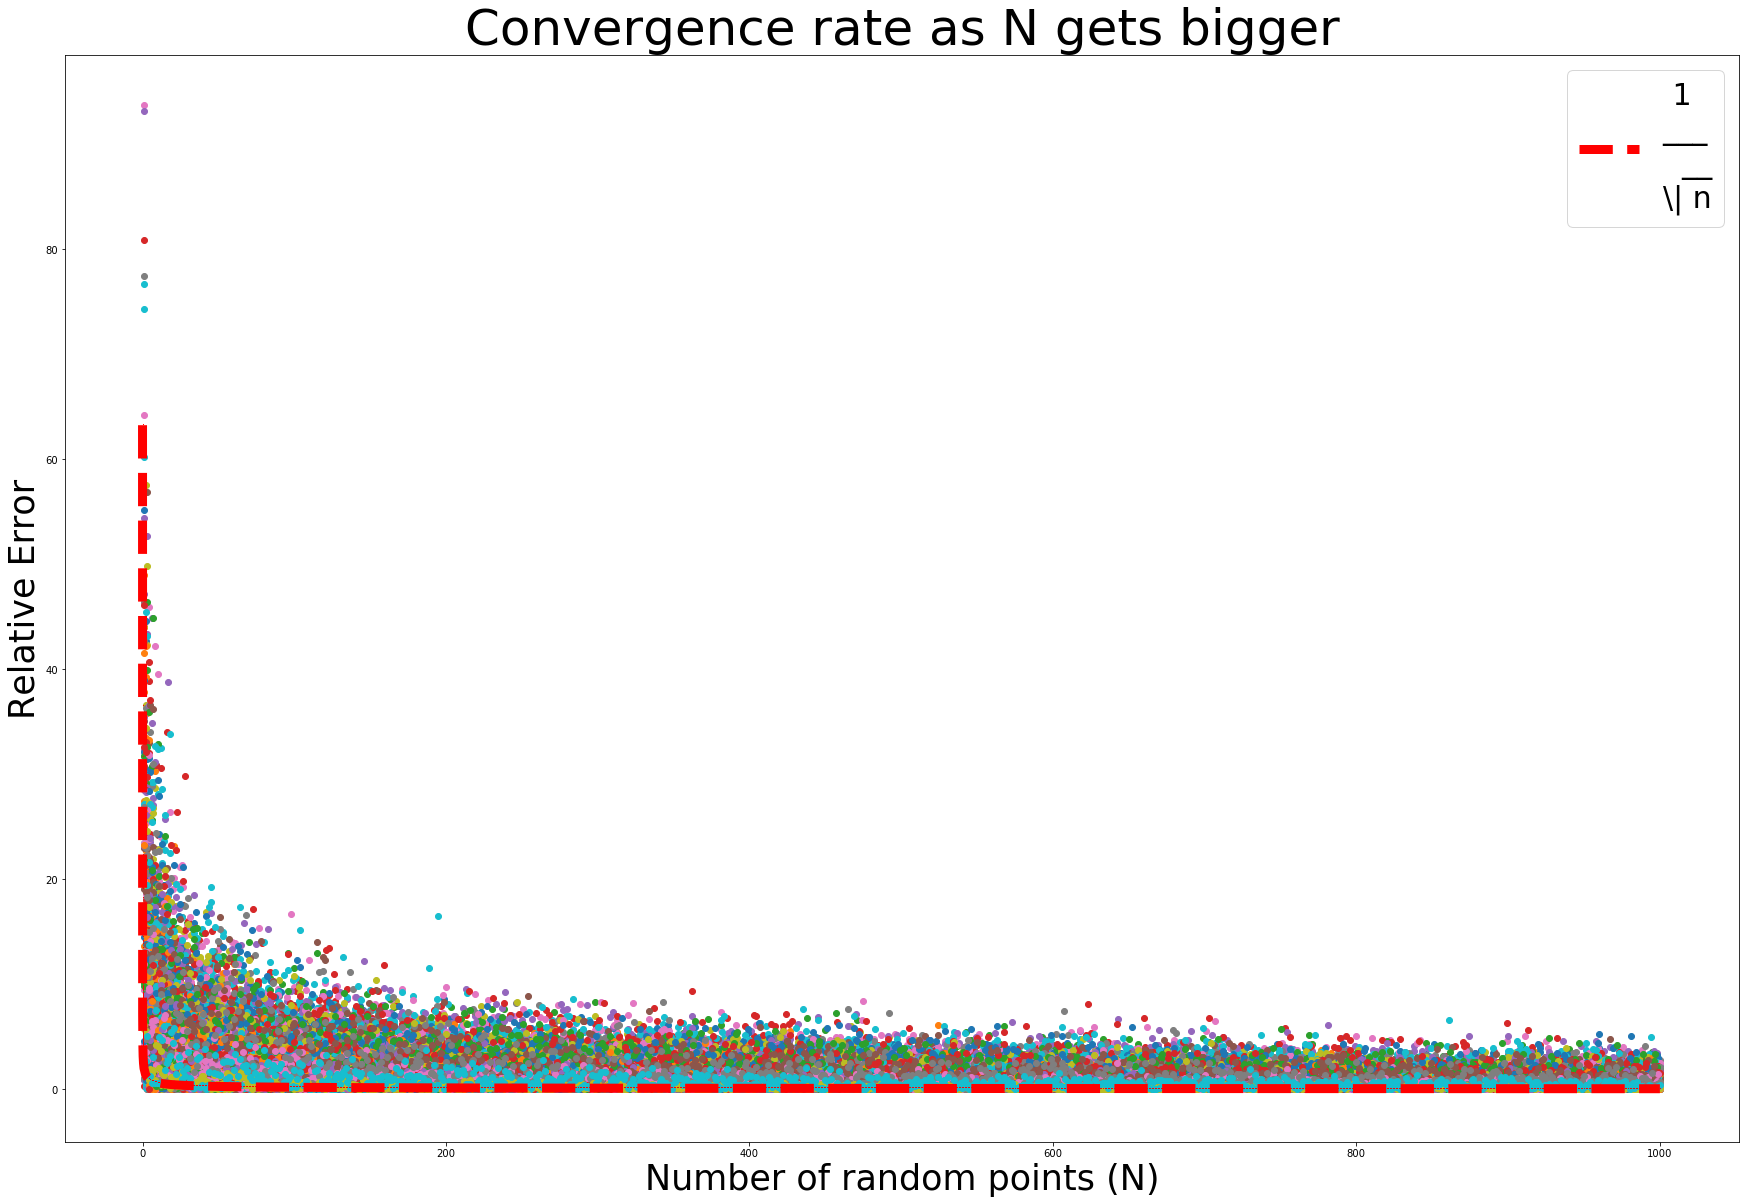

In [0]:
test = testMonteCarloQuad()

In [0]:
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 3.553s

OK


# **Discussion**

The success message for the tests of the Gaussian Quadratures proves their functionality. The scatter plot showed makes for a great visual-aid to present the convergence rate for our Monte Carlo integration implementation. One interesting point is that even if the Gaussian methods yield exact results in theory, in practice this can vary for different reasons, like floating point errors in some calculations.